Ta zvezek je wip

Pripravimo vse podatke za obdelavo in uvozimo slovar z imeni predmetov.

In [111]:
from csv import DictReader
import pickle
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fp = open('podatki.csv', 'rt')
reader = DictReader(fp)

data = []

for row in reader:
    data.append([row['vpisna'],row['predmet'],row['semester']])


pickle_in = open("dict.pickle","rb")
kratica_ime = pickle.load(pickle_in)


dataVss=[]

#podatki za samo vss + pretvorimo se kratico v ime predemeta
for el in data:
    #zaka je kle tko narjen ja zato ker to so uni ko pa za enkrat gledamo samo vss, zakaj sta samo ta 2 predemti iz uni kle pa nevem
    if kratica_ime.get(el[1]) is not None and el[1] != '_P' and el[1] != 'RIS(63268)_P' and el[1] != 'P2(63278)_P' and el[1] != 'P1_P' :
        dataVss.append([el[0],kratica_ime[el[1]],el[2]])


Prestejemo za vse predmete koliko vpisnih je bilo na njih in nato predstavimo z bar grafom

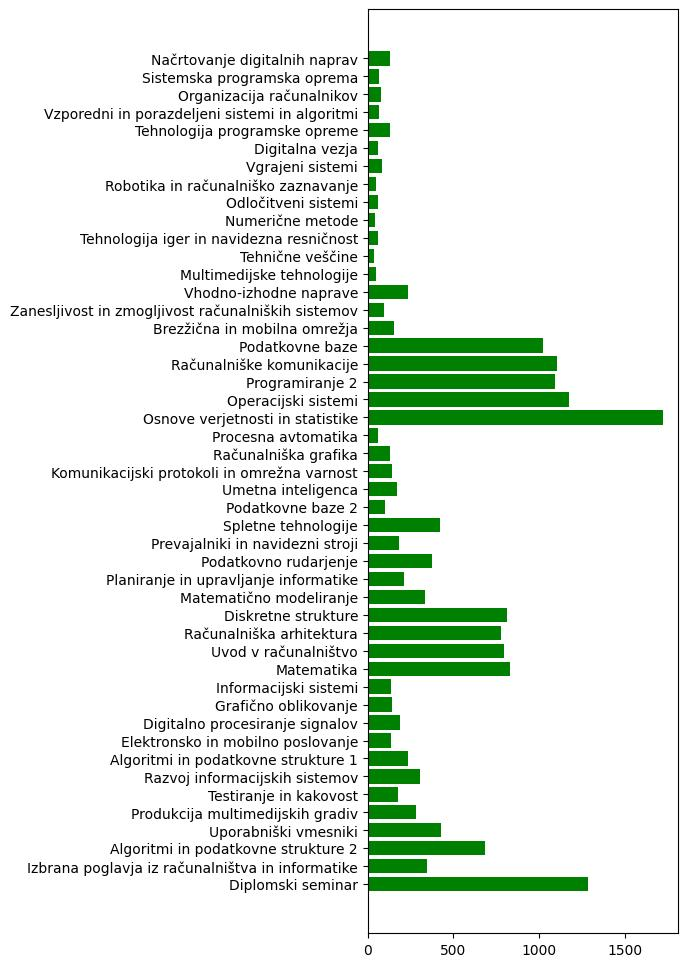

In [109]:

countPredmet = {}
for el in dataVss:
    try:
        countPredmet[el[1]]+=1
    except:
        countPredmet[el[1]]=1
        
plt.figure(figsize=(4, 12))
plt.barh(countPredmet.keys(), countPredmet.values(),  color='g')
plt.show()

Nasljedno so studenti po letih. gremo cez vsako vpisno preverimo ali semester spada pod iskano leto. V primeru da ja dodamo njegovo vpisno v set ki preprecuje 
da bi se vpisne ponavljale. Nato je velkiost seta enaka stevilu studentov ki so bili isto leto vpisani na faks. 
To naj bi naceloma bli podatki koliko ljudi se je na novo vpisalo v 1. letnik

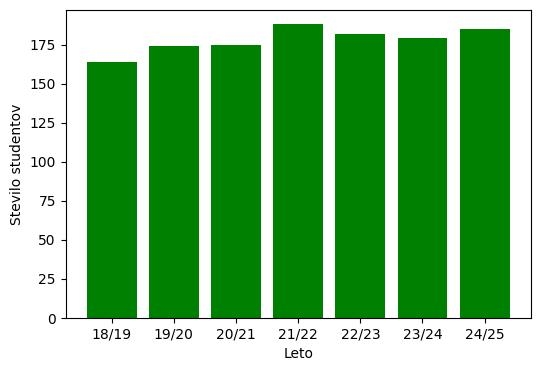

In [ ]:

VpisiCount = {}
for i in range(18,25):
    leto = str(i) + "/" + str(i+1)
    Vpisi = set()
    for el in dataVss:
        if el[2][0:5] == leto and el[0][2:4]==leto[0:2]:
            Vpisi.add(el[0])
    VpisiCount[leto] = len(Vpisi)


plt.figure(figsize=(6, 4))
plt.ylabel("Stevilo novih vpisov v 1. letnik")
plt.xlabel("Leto")
plt.bar(VpisiCount.keys(), VpisiCount.values(),  color='g')
plt.show()

